In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# get the dataset from the csv file
df = pd.read_csv('StockDataset.csv')
print("Imported Dataframe: ")
print(df)

Imported Dataframe: 
            Date       High        Low       Open      Close       Volume  \
0     2012-01-03  14.732142  14.607142  14.621428  14.686786  302220800.0   
1     2012-01-04  14.810000  14.617143  14.642858  14.765715  260022000.0   
2     2012-01-05  14.948215  14.738214  14.819643  14.929643  271269600.0   
3     2012-01-06  15.098214  14.972143  14.991786  15.085714  318292800.0   
4     2012-01-09  15.276786  15.048214  15.196428  15.061786  394024400.0   
...          ...        ...        ...        ...        ...          ...   
1998  2019-12-11  67.775002  67.125000  67.202499  67.692497   78756800.0   
1999  2019-12-12  68.139999  66.830002  66.945000  67.864998  137310400.0   
2000  2019-12-13  68.824997  67.732498  67.864998  68.787498  133587600.0   
2001  2019-12-16  70.197502  69.245003  69.250000  69.964996  128186000.0   
2002  2019-12-17  70.442497  69.699997  69.892502  70.102501  114158400.0   

      Adj Close  
0     12.669562  
1     12.737655  


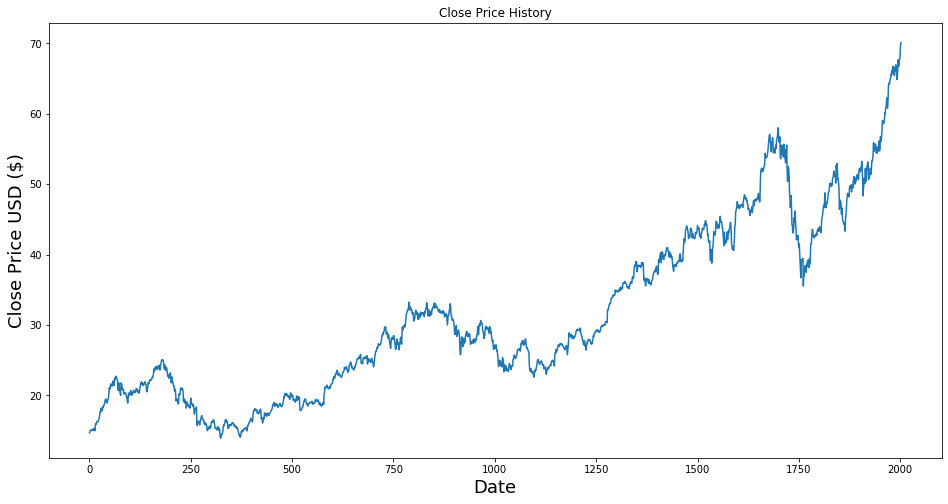

In [3]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])  # Converting the dataframe to a numpy array
dataset = data.values  # Get the number of rows to train the model on

In [5]:
# get the no of training data size
training_data_len = math.ceil(len(dataset) * .75)

In [6]:
print("dataset : ")
print(dataset)

dataset : 
[[14.6867857 ]
 [14.76571465]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


In [7]:
print("length of the dataset: ")
print(training_data_len)

length of the dataset: 
1503


In [8]:
# Scale the all of the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
print('Scaled data: ')
print(scaled_data)

Scaled data: 
[[0.01316509]
 [0.01457064]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [9]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]  
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [11]:
# we need to train the dataset accourding to the past 60 days of data
# so we get and insert the past 60 days data into x_train array
# y_train contains the value after 60 days. which means 61st day's value (this is the value we should predicted)

# eg : testArray = [1,2,3,4,5,6,7,8,9,10,11]
# learn from past 10 days and predict the 11th day
# x_train = [1,2,3,4,5,6,7,8,9,10]
# y_train = [11]

In [12]:
prev_days = 60

In [13]:
for i in range(prev_days, len(train_data)):
    x_train.append(train_data[i - prev_days:i, 0])
    y_train.append(train_data[i, 0])
    
# Test data set
test_data = scaled_data[training_data_len - prev_days:, :]  # Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, : ]

for i in range(prev_days, len(test_data)):
    x_test.append(test_data[i - prev_days:i, 0])

In [14]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_test = np.array(x_test)

In [15]:
# Reshape the data into the shape accepted by the LSTM
# untile now x_train contains 2 dimentions (noOfRows, NoOfColumns)
# but LSTM model requirs 3 dimentions
# there for we have to reshape the x_train by adding new diamention (no of timesteps)

In [16]:
# x_train = np.reshape(x_train, (1543, 60, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1443/1443 [==============================] - 37s 24ms/step - loss: 0.0023
Epoch 2/3
1443/1443 [==============================] - 38s 26ms/step - loss: 3.3391e-04 0s - loss: 3. - ETA: 0s - loss:
Epoch 3/3
1443/1443 [==============================] - 41s 29ms/step - loss: 2.4741e-04


In [20]:
# Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling

In [21]:
# Get the value of RMSE (to test)
# if the rmse value is around 5, then model is considered as a good model
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

1.809481127331385


In [23]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions  # Visualize the data

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


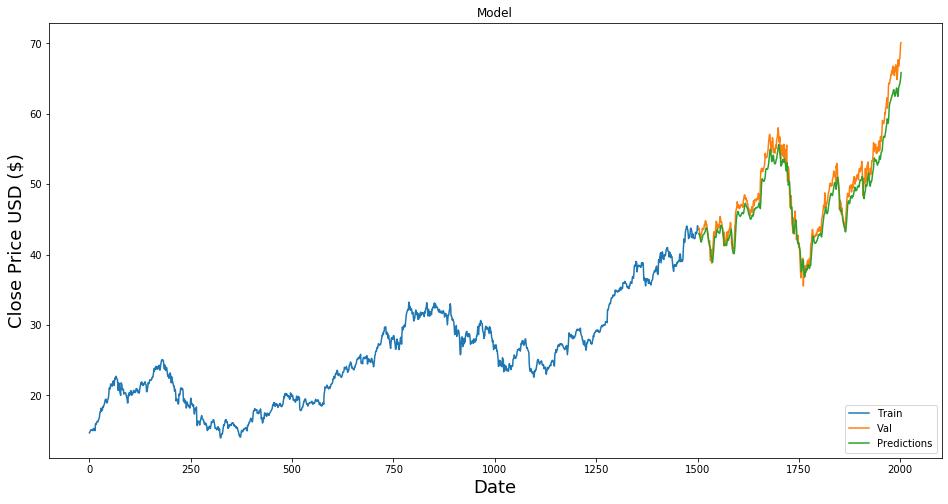

In [24]:
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()